In [2]:
import pandas as pd 
import tldextract

df = pd.read_csv("../resource/whotracksme_trackers.txt",names = ['tracker_registered_domain'])
tldextract.extract("www.baidu.com").domain

'baidu'

In [3]:
def get_domain(row):
    return tldextract.extract(row['tracker_registered_domain']).domain
df['domain'] = df.apply(get_domain,axis = 1)
df

,tracker_registered_domain,domain
0,dtym7iokkjlif.cloudfront.net,cloudfront
1,shareaholic.com,shareaholic
2,33across.com,33across
3,accesstrade.net,accesstrade
4,scupio.com,scupio
...,...,...
1280,y-track.com,y-track
1281,zalan.do,zalan
1282,zalando.de,zalando
1283,zencdn.net,zencdn


In [4]:
len(df['domain'].unique())

1091

In [5]:
df_trackers_edu = pd.read_csv("../dataset_archive/df_rate_merge_edu_whoexclude.csv")
df_trackers_control = pd.read_csv("../dataset_archive/df_rate_merge_base_whoexclude.csv")

In [6]:
from matplotlib_venn import venn2, venn2_circles
import matplotlib.pyplot as plt

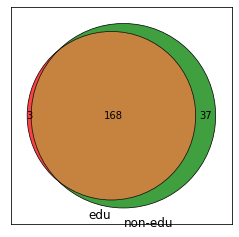

In [7]:
year = 2012
edu_trackers = set(df_trackers_edu[df_trackers_edu[str(year)].notna()]['trackers'].to_list())
control_trackers = set(df_trackers_control[df_trackers_control[str(year)].notna()]['trackers'].to_list())
venn2([edu_trackers, control_trackers],set_labels =('edu','non-edu'),alpha=0.75)
venn2_circles([edu_trackers, control_trackers],lw = 0.7)
plt.axis(True)
plt.savefig("../images/unique_trackers/2012_interaction.png",dpi = 200)
plt.show()


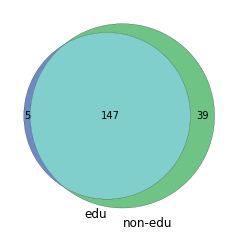

In [8]:
year = 2021
edu_trackers = set(df_trackers_edu[df_trackers_edu[str(year)].notna()]['trackers'].to_list())
control_trackers = set(df_trackers_control[df_trackers_control[str(year)].notna()]['trackers'].to_list())
venn2([edu_trackers, control_trackers],set_colors=('#3E64AF', '#3EAF5D'),set_labels =('edu','non-edu'),alpha=0.75)
venn2_circles([edu_trackers, control_trackers],lw = 0.2)
# plt.axis(True)
plt.savefig("../images/unique_trackers/2021_interaction.png",dpi = 200)
plt.show()

In [9]:
len(edu_trackers.union(control_trackers))

191

## What uniques trakcesr in educational websites

In [10]:
list_special_trackers = []

for year in range(2012,2022):
    print(year)
    edu_trackers = set(df_trackers_edu[df_trackers_edu[str(year)].notna()]['trackers'].to_list())
    control_trackers = set(df_trackers_control[df_trackers_control[str(year)].notna()]['trackers'].to_list())
    print("special trackers in educational websites",edu_trackers - control_trackers)
    list_special_trackers.extend(list(edu_trackers - control_trackers))
    # print("special trackers in non-educational websites",control_trackers - edu_trackers)

2012
special trackers in educational websites {'hitbox', 'luxup', 'mlstatic'}
2013
special trackers in educational websites {'mlstatic', 'nedstat', 'qksz'}
2014
special trackers in educational websites {'hitbox', 'nedstat', 'qksz'}
2015
special trackers in educational websites {'hitbox', 'tkqlhce', 'mixmarket', 'nedstat'}
2016
special trackers in educational websites {'hitbox', 'mlstatic', 'mixmarket', 'nedstat'}
2017
special trackers in educational websites {'pantherssl', 'hitbox', 'iperceptions', 'nedstat'}
2018
special trackers in educational websites {'nedstat', 'iperceptions', 'mlstatic', 'llnwd', 'pantherssl', 'hitbox'}
2019
special trackers in educational websites {'nedstat', 'mlstatic', 'plista', 'llnwd', 'hitbox'}
2020
special trackers in educational websites {'hitbox', 'casalemedia', 'mlstatic', 'nedstat'}
2021
special trackers in educational websites {'nedstat', 'list-manage', 'casalemedia', 'mlstatic', 'hitbox'}


In [16]:
from collections import Counter
tracker_count = Counter(list_special_trackers)
tracker_count.most_common()

[('hitbox', 9),
 ('nedstat', 9),
 ('mlstatic', 7),
 ('qksz', 2),
 ('mixmarket', 2),
 ('pantherssl', 2),
 ('iperceptions', 2),
 ('llnwd', 2),
 ('casalemedia', 2),
 ('luxup', 1),
 ('tkqlhce', 1),
 ('plista', 1),
 ('list-manage', 1)]

In [12]:
df_heat_map = df_trackers_edu[df_trackers_edu['trackers'].isin(list_special_trackers)]
df_heat_map

,trackers,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
73,pantherssl,0.000723,0.000612,0.000389,0.000334,0.000167,0.000167,0.000056,NaN,NaN,NaN
87,casalemedia,0.000501,0.000668,0.000111,0.000056,NaN,NaN,NaN,0.000056,0.000056,0.000056
92,iperceptions,0.000445,0.000445,0.000501,0.000501,0.000111,0.000111,0.000111,NaN,NaN,NaN
134,hitbox,0.000167,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056
142,qksz,0.000167,0.000167,0.000111,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,nedstat,0.000111,0.000167,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056,0.000056
156,llnwd,0.000056,0.000056,NaN,0.000111,0.000056,NaN,0.000056,0.000056,NaN,NaN
160,mlstatic,0.000056,0.000056,NaN,NaN,0.000056,NaN,0.000056,0.000056,0.000056,0.000056
162,mixmarket,0.000056,0.000056,0.000056,0.000056,0.000056,NaN,NaN,NaN,NaN,NaN
169,luxup,0.000056,0.000056,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
import matplotlib
import matplotlib.pyplot as plt
def heatmap(data, row_labels, col_labels, ax=None,
            cbar_kw={}, cbarlabel="", **kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (M, N).
    row_labels
        A list or array of length M with the labels for the rows.
    col_labels
        A list or array of length N with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data, **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # Show all ticks and label them with the respective list entries.
    ax.set_xticks(np.arange(data.shape[1]), labels=col_labels)
    ax.set_yticks(np.arange(data.shape[0]), labels=row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    ax.spines[:].set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar


def annotate_heatmap(im, data=None, valfmt="{x:.2f}",
                     textcolors=("black", "white"),
                     threshold=None, **textkw):
    """
    A function to annotate a heatmap.

    Parameters
    ----------
    im
        The AxesImage to be labeled.
    data
        Data used to annotate.  If None, the image's data is used.  Optional.
    valfmt
        The format of the annotations inside the heatmap.  This should either
        use the string format method, e.g. "$ {x:.2f}", or be a
        `matplotlib.ticker.Formatter`.  Optional.
    textcolors
        A pair of colors.  The first is used for values below a threshold,
        the second for those above.  Optional.
    threshold
        Value in data units according to which the colors from textcolors are
        applied.  If None (the default) uses the middle of the colormap as
        separation.  Optional.
    **kwargs
        All other arguments are forwarded to each call to `text` used to create
        the text labels.
    """

    if not isinstance(data, (list, np.ndarray)):
        data = im.get_array()

    # Normalize the threshold to the images color range.
    if threshold is not None:
        threshold = im.norm(threshold)
    else:
        threshold = im.norm(data.max())/2.

    # Set default alignment to center, but allow it to be
    # overwritten by textkw.
    kw = dict(horizontalalignment="center",
              verticalalignment="center")
    kw.update(textkw)

    # Get the formatter in case a string is supplied
    if isinstance(valfmt, str):
        valfmt = matplotlib.ticker.StrMethodFormatter(valfmt)

    # Loop over the data and create a `Text` for each "pixel".
    # Change the text's color depending on the data.
    texts = []
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            kw.update(color=textcolors[int(im.norm(data[i, j]) > threshold)])
            text = im.axes.text(j, i, valfmt(data[i, j], None), **kw)
            texts.append(text)

    return texts

In [14]:
import numpy as np 
# vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
#               "potato", "wheat", "barley"]
# farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
#            "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

# harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
#                     [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
#                     [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
#                     [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
#                     [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
#                     [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
#                     [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])
trackers_names = df_heat_map['trackers'].to_list()
years = list(map(str,list(range(2012,2022))))
occurance = df_heat_map[years].notna().astype(float)
occurance.values

array([[1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1., 0., 1., 1., 0., 0.],
       [1., 1., 0., 0., 1., 0., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

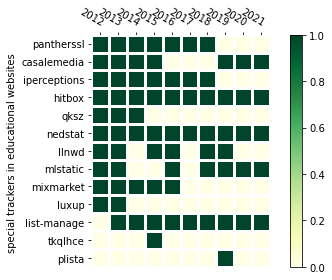

In [15]:
fig, ax = plt.subplots()

im, cbar = heatmap(occurance, trackers_names, years, ax=ax,
                   cmap="YlGn", cbarlabel=None)
# texts = annotate_heatmap(im, valfmt="{x:.1f} t")

fig.tight_layout()
# plt.xlabel('years')
plt.ylabel('special trackers in educational websites ')
plt.savefig("../images/unique_trackers/heatmap.png",dpi = 200)